In [12]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv(r"C:\Users\dasarred\SIDFtrain.csv")
#Kaggle store item demand forecast train data

In [14]:
data.shape

(913000, 4)

In [15]:
data.size

3652000

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null object
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [17]:
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [18]:
data.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [19]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [36]:
data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [21]:
data['sales'].isnull().count()

913000

In [22]:
data['item'].isnull().count()

913000

In [23]:
data['store'].isnull().count()

913000

In [24]:
import seaborn as sns

In [32]:
data['sales'].max()

231

In [33]:
data['sales'].min()

0

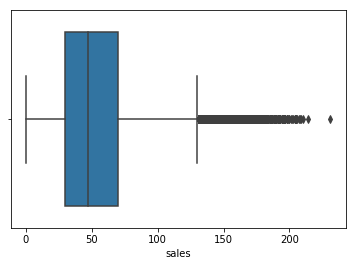

In [25]:
s1 = sns.boxplot(data['sales'], showfliers=True, )
plt.show()

In [26]:
q1 = np.percentile(data['sales'],25)
q3 = np.percentile(data['sales'],75)
iqr = q3-q1
iqr

40.0

In [27]:
upper = q3+1.5*iqr
lower = q1-1.5*iqr
lower, upper

(-30.0, 130.0)

In [28]:
data[(data["sales"]>upper) | (data["sales"]<lower)].shape[0]

11967

In [29]:
data.shape[0]

913000

There are 11967 observations according to Interquartilerange that are outliers in sales column

In [31]:
z = (data["sales"] - np.mean(data["sales"]))/np.std(data["sales"])
(np.absolute(z)>2.5).sum()

17535

There are 17535 observations which are outliers according to Z-Score in sales column

In [49]:
corr = data.corr()
corr

,0,1,2
0,1.000000,0.99858,0.270252
1,0.998580,1.00000,0.218580
2,0.270252,0.21858,1.000000


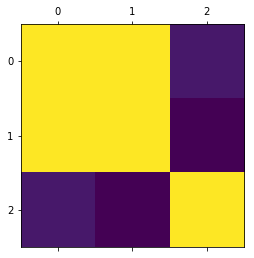

In [56]:
plt.matshow(corr)

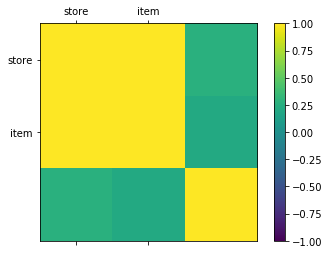

In [57]:
names = ['store', 'item', 'sales']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,2,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

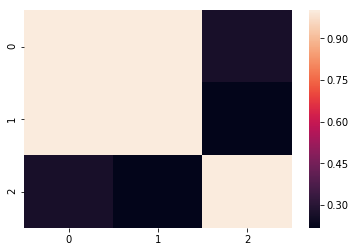

In [58]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

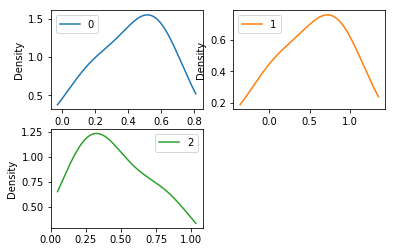

In [70]:
#Density plots 
data.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()

In [72]:
#Box and Whisker plots 
#data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
#plt.show()

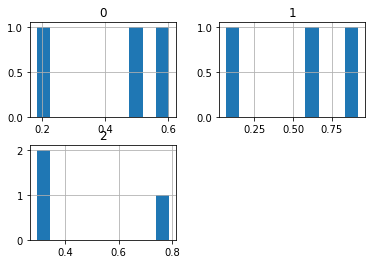

In [73]:
data.hist()
plt.show()

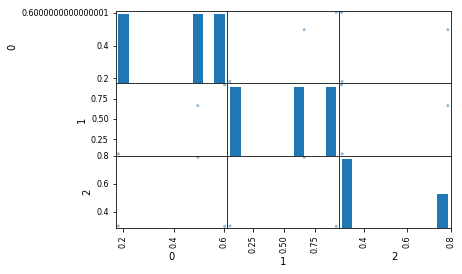

In [75]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()